<a href="https://colab.research.google.com/github/insanedays/Desafio_Tone-data_analytics-/blob/master/Desafio_TONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando Blibliotecas

In [243]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt


### Criando DataFrame

In [194]:
creds = pd.read_csv("/content/drive/MyDrive/Desafios - Empresas/TONE/creds (2).csv", sep=",")
creds


,Unnamed: 0,cred_date,shipping_address_city,shipping_address_state,max_machine,accountid
0,0,2020-04-18,Feira de Santana,BA,T1,NaN
1,1,2020-10-16,Bacuri,MA,T1,NaN
2,2,2020-09-01,Bernardo Sayão,TO,T1,NaN
3,3,2020-08-29,Rio de Janeiro,RJ,T3,NaN
4,4,2020-07-28,São Gonçalo,RJ,T3,0013j00002z0CeEAAU
...,...,...,...,...,...,...
126984,126984,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ
126985,126985,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ
126986,126986,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ
126987,126987,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ


In [195]:
cases = pd.read_csv("/content/drive/MyDrive/Desafios - Empresas/TONE/cases (2).csv", sep=",")

In [196]:
cases

,Unnamed: 0,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU
...,...,...,...,...,...,...,...,...,...
126984,126984,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ
126985,126985,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ
126986,126986,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ
126987,126987,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ


In [197]:
#unindo dataframes
dataframe = pd.merge(creds,cases)
dataframe

,Unnamed: 0,cred_date,shipping_address_city,shipping_address_state,max_machine,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id
0,0,2020-04-18,Feira de Santana,BA,T1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-10-16,Bacuri,MA,T1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-09-01,Bernardo Sayão,TO,T1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-08-29,Rio de Janeiro,RJ,T3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-07-28,São Gonçalo,RJ,T3,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126984,126984,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ
126985,126985,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ
126986,126986,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ
126987,126987,2020-06-20,Petrópolis,RJ,T2,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ


### Tratamento

In [198]:
#removendo colunas

dataframe = dataframe.drop(columns=['Id','Unnamed: 0','accountid', 'Id'])


dataframe.head(2)

,cred_date,shipping_address_city,shipping_address_state,max_machine,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto
0,2020-04-18,Feira de Santana,BA,T1,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-16,Bacuri,MA,T1,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
#renomenado colunas para facilitar visualização
dataframe = dataframe.rename(columns={'date_ref': 'chamado_date', 'channelid':'canal_chamado', 'waitingtime':'time_seg', 'pesquisa_de_satisfa_o__c':'pesquisa', 'shipping_address_city':"cidade_entrega", 'shipping_address_state':'estado_entrega','max_machine':'produto'})

In [200]:
dataframe.head(20)

,cred_date,cidade_entrega,estado_entrega,produto,chamado_date,canal_chamado,time_seg,missed,pesquisa,assunto
0,2020-04-18,Feira de Santana,BA,T1,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-16,Bacuri,MA,T1,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-01,Bernardo Sayão,TO,T1,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-29,Rio de Janeiro,RJ,T3,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-07-28,São Gonçalo,RJ,T3,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...
5,2020-07-28,São Gonçalo,RJ,T3,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação
6,2020-07-28,São Gonçalo,RJ,T3,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas
7,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking
8,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros
9,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Produto:Cartão pré-pago:Dúvidas


In [201]:
#identificando dados faltantes
dataframe.isnull().sum()

cred_date              0
cidade_entrega         0
estado_entrega         0
produto                0
chamado_date       49500
canal_chamado      49500
time_seg           49500
missed             49500
pesquisa          115404
assunto            49500
dtype: int64

In [202]:
#linha pra tratar os NaN se houver necessidade

In [203]:
dataframe.dtypes

cred_date          object
cidade_entrega     object
estado_entrega     object
produto            object
chamado_date       object
canal_chamado     float64
time_seg          float64
missed             object
pesquisa           object
assunto            object
dtype: object

In [216]:
#transformando em data
dataframe['chamado_date'] = pd.to_datetime(dataframe['chamado_date'])
dataframe['cred_date'] = pd.to_datetime(dataframe['cred_date'])


In [205]:
#transformando em inteiro

###########dataframe['canal_chamado'].astype(int)

#dataframe['canal_chamado'] = dataframe['canal_chamado'].values.astype(np.int64)



In [206]:
dataframe['canal_chamado'].dtype


dtype('float64')

In [207]:
#transformando em string
dataframe[['cidade_entrega', 'estado_entrega','produto']] = dataframe[['cidade_entrega', 'estado_entrega','produto']].astype(str)

In [208]:
dataframe.dtypes

cred_date                 object
cidade_entrega            object
estado_entrega            object
produto                   object
chamado_date      datetime64[ns]
canal_chamado            float64
time_seg                 float64
missed                    object
pesquisa                  object
assunto                   object
dtype: object

### Analises Exploratórias

In [209]:
dataframe.head(10)


,cred_date,cidade_entrega,estado_entrega,produto,chamado_date,canal_chamado,time_seg,missed,pesquisa,assunto
0,2020-04-18,Feira de Santana,BA,T1,NaT,NaN,NaN,NaN,NaN,NaN
1,2020-10-16,Bacuri,MA,T1,NaT,NaN,NaN,NaN,NaN,NaN
2,2020-09-01,Bernardo Sayão,TO,T1,NaT,NaN,NaN,NaN,NaN,NaN
3,2020-08-29,Rio de Janeiro,RJ,T3,NaT,NaN,NaN,NaN,NaN,NaN
4,2020-07-28,São Gonçalo,RJ,T3,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...
5,2020-07-28,São Gonçalo,RJ,T3,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação
6,2020-07-28,São Gonçalo,RJ,T3,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas
7,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking
8,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros
9,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Produto:Cartão pré-pago:Dúvidas


In [210]:
#Explorando dados
dataframe["pesquisa"].value_counts()

Enviado        9996
Incrivel        899
Bom             425
Normal          112
NaoResolveu     107
Feliz            19
MalAtendido      16
Triste            6
Pessimo           3
Cansativo         2
Name: pesquisa, dtype: int64

In [211]:

dataframe["assunto"].value_counts()

Produto:Cartão pré-pago:Dúvidas                                  5153
Logística:OS:Tracking de OS                                      4947
Aplicativo:Dúvidas funcionalidades App:Transferência bancária    4243
Transferência de saldo:Conta bancária:Problema                   2870
Produto:Modelo de recebimento:                                   2488
                                                                 ... 
Feedback do cliente:Cartão:                                         1
Aplicativo:Cartões:                                                 1
Telecom::                                                           1
Logística:Envio de Cartão pré-pago:2 via Stone Mais                 1
Produto:mPOS:                                                       1
Name: assunto, Length: 221, dtype: int64

### QUESTÃO 1

Preciso verificar me baseando nas datas, a quantidade de chamadas.

Fazer um gráfico para visualizar a frequência dessas chamadas mensalmente. 



In [319]:
dataframe.head(20)


,cred_date,cidade_entrega,estado_entrega,produto,chamado_date,canal_chamado,time_seg,missed,pesquisa,assunto,chamado_mes,cred_mes
0,2020-04-18,Feira de Santana,BA,T1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2020-10-16,Bacuri,MA,T1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,10
2,2020-09-01,Bernardo Sayão,TO,T1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,9
3,2020-08-29,Rio de Janeiro,RJ,T3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,8
4,2020-07-28,São Gonçalo,RJ,T3,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,7.0,7
5,2020-07-28,São Gonçalo,RJ,T3,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação,7.0,7
6,2020-07-28,São Gonçalo,RJ,T3,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,9.0,7
7,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking,8.0,8
8,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros,8.0,8
9,2020-08-28,Itaboraí,RJ,T1,2020-08-29,2.0,6.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,8.0,8


In [320]:
#########agupamento_mes = dataframe.groupby(dataframe["chamado_date"].dt.year)["estado_entrega"]

In [321]:
#criando coluna para o mês
dataframe["chamado_mes"] = dataframe['chamado_date'].dt.month
dataframe["cred_mes"] = dataframe['cred_date'].dt.month

In [322]:
dataframe.head(1)

,cred_date,cidade_entrega,estado_entrega,produto,chamado_date,canal_chamado,time_seg,missed,pesquisa,assunto,chamado_mes,cred_mes
0,2020-04-18,Feira de Santana,BA,T1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4


In [323]:
#total de chamadas
dataframe["missed"].count()

77489

In [324]:
chamado_mes = dataframe['chamado_mes'].value_counts().index

chamado_qtd = dataframe['chamado_mes'].value_counts()

<BarContainer object of 9 artists>

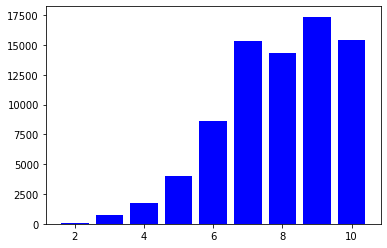

In [325]:
plt.bar(chamado_mes , chamado_qtd, color= "blue")

In [326]:
dataframe['chamado_mes'].value_counts()

9.0     17381
10.0    15391
7.0     15318
8.0     14305
6.0      8587
5.0      3978
4.0      1730
3.0       708
2.0        91
Name: chamado_mes, dtype: int64

In [327]:
chamado_qtd = chamado_qtd.values

In [328]:
708/91


7.78021978021978

In [329]:
1730/708

2.443502824858757

In [330]:
3978/1730

2.299421965317919

In [331]:
8587/3978

2.1586224233283056

In [332]:
# 
15318/8587

1.7838593222312797

In [333]:
14305/15318

0.9338686512599557

In [334]:
15391/14305  

1.0759175113596644

In [335]:
15391/17381

0.885507162994074

O mês de agosto teve uma queda de 1013 chamadOs, isso equivale a uma reduç]ao de 6% considerando os chamados do mês anterior. Observa-se que volta a subir em Setembo mas obtem mais uma redução em outubro. 
Podemos considerar também a taxa em que as chamadas no mêses anteriores de implementação da nova funcionalidade cresciam, poodendo afirmar um impacto estátisticamente relevante.  Isolei o mês 2 do calculo pq ele diverge muito do aumentos mèdios dos outros meses. Caculei, a média de aumento mensal até antes da implantação que era de 200%, e após a implantação teve uma redução significativa. 

### QUESTÃO 2